In [1]:
import os
os.getcwd()

os.chdir('./rsna-pneumonia-detection-challenge/')

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Extracting data and exploring

In [4]:
import pydicom
import os,pylab
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import seaborn as sns
from tqdm import tqdm


In [5]:
labels = pd.read_csv('stage_2_detailed_class_info.csv')

In [6]:
labels.head(7)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal


In [7]:
# NO OF UNIQUE PATIENTS
labels['patientId'].nunique(),labels.shape

(26684, (30227, 2))

In [8]:
labels.groupby('class').count()

,patientId
class,
Lung Opacity,9555
No Lung Opacity / Not Normal,11821
Normal,8851


The labels show that their are 9555 patients with pneumonia , 11821 with other problems but not pneumonia and 8851 as normal

In [9]:
train_labels=pd.read_csv('stage_2_train_labels.csv')

In [10]:
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [11]:
train_labels = train_labels.fillna(int(0))
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [12]:
train_labels.groupby('Target').count()

,patientId,x,y,width,height
Target,,,,,
0,20672,20672,20672,20672,20672
1,9555,9555,9555,9555,9555


Target 1 means pneumonia or Lung opacity for others it is zero

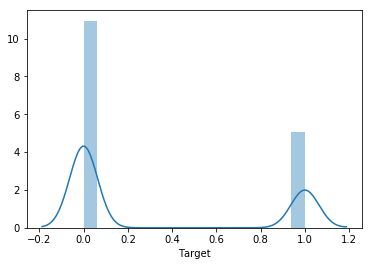

In [13]:
sns.distplot(train_labels['Target'])

In [14]:
train_data = pd.merge(left=train_labels,right=labels,on='patientId')

In [15]:
train_data.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [16]:
train_data.describe()

,x,y,width,height,Target
count,37629.000000,37629.000000,37629.000000,37629.000000,37629.000000
mean,179.794945,162.428818,98.809562,152.224800,0.450636
std,241.500880,205.415528,116.110490,199.098279,0.497564
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,290.000000,327.000000,210.000000,285.000000,1.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000


In [17]:
train_data.groupby('class').count()

,patientId,x,y,width,height,Target
class,,,,,,
Lung Opacity,16957,16957,16957,16957,16957,16957
No Lung Opacity / Not Normal,11821,11821,11821,11821,11821,11821
Normal,8851,8851,8851,8851,8851,8851


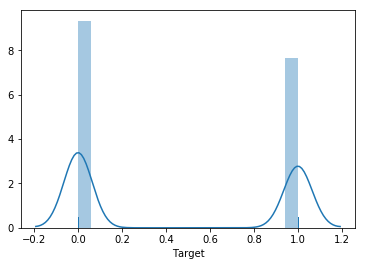

In [18]:
sns.distplot(train_data['Target'],rug=True)

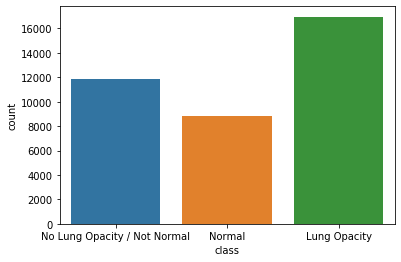

In [19]:
sns.countplot(train_data['class'])

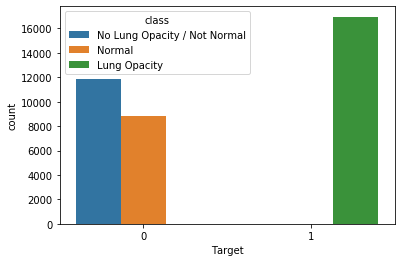

In [20]:
sns.countplot(train_data['Target'],hue=train_data['class'])

Lets look at the X-ray images one for target value 0 and one for target value 1
from train_labels.head() abve the 0 and 4th images we will see


Filename.........: ./stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
Patient id.......: 0004cfab-14fd-4e49-80ba-63a80b6bddd6
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

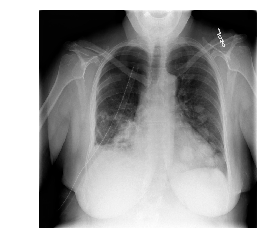

In [19]:
file = train_labels['patientId'][0]+'.dcm'
path = os.path.join('./stage_2_train_images/',file)
image = pydicom.dcmread(path)
print()
print("Filename.........:", path)
#print("class:",image.class)

print("Patient id.......:", image.PatientID)
img = image.pixel_array
print(img.shape)
pylab.imshow(img, cmap=pylab.cm.gist_gray)
pylab.axis('off')



Filename.........: ./stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm
Patient id.......: 00436515-870c-4b36-a041-de91049b9ab4


(-0.5, 1023.5, 1023.5, -0.5)

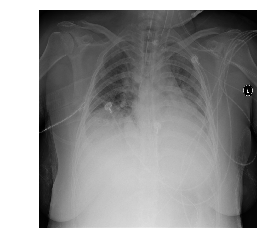

In [20]:
file = train_labels['patientId'][4]+'.dcm'
path = os.path.join('./stage_2_train_images/',file)
image = pydicom.dcmread(path)
print()
print("Filename.........:", path)


print("Patient id.......:", image.PatientID)

img = image.pixel_array
pylab.imshow(img, cmap=pylab.cm.gist_gray)
pylab.axis('off')


In [21]:
def parse_data(df):
    """
    Method to read a CSV file (Pandas dataframe) and parse the 
    data into the following nested dictionary:

      parsed = {
        
        'patientId-00': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        },
        'patientId-01': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        }, ...

      }

    """
    # --- Define lambda to extract coords in list [y, x, height, width]
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows():
        # --- Initialize patient entry into parsed 
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': './stage_2_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': [],
                'class': row['class']}

        # --- Add box if opacity is present
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))
        
    return parsed

In [22]:
parsed = parse_data(train_data)

In [23]:
df_parsed = pd.DataFrame(parsed)

In [24]:
df_final = df_parsed.T
df_final.head()

,boxes,class,dicom,label
0004cfab-14fd-4e49-80ba-63a80b6bddd6,[],No Lung Opacity / Not Normal,./stage_2_train_images/0004cfab-14fd-4e49-80ba...,0
00313ee0-9eaa-42f4-b0ab-c148ed3241cd,[],No Lung Opacity / Not Normal,./stage_2_train_images/00313ee0-9eaa-42f4-b0ab...,0
00322d4d-1c29-4943-afc9-b6754be640eb,[],No Lung Opacity / Not Normal,./stage_2_train_images/00322d4d-1c29-4943-afc9...,0
003d8fa0-6bf1-40ed-b54c-ac657f8495c5,[],Normal,./stage_2_train_images/003d8fa0-6bf1-40ed-b54c...,0
00436515-870c-4b36-a041-de91049b9ab4,"[[152.0, 264.0, 379.0, 213.0], [152.0, 264.0, ...",Lung Opacity,./stage_2_train_images/00436515-870c-4b36-a041...,1


In [25]:
df_final.shape

(26684, 4)

In [26]:
df_final.groupby('class').count()

,boxes,dicom,label
class,,,
Lung Opacity,6012,6012,6012
No Lung Opacity / Not Normal,11821,11821,11821
Normal,8851,8851,8851


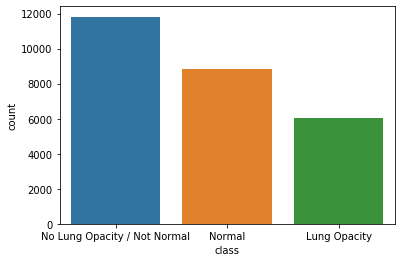

In [38]:
sns.countplot(df_final['class'])

In [36]:
if not os.path.exists('./train_img1_jpg/'):
    os.mkdir('./train_img1_jpg/')
    jpg_path = './train_img1_jpg/'
    for i in range(len(df_final['dicom'])):
        ds = pydicom.read_file(df_final['dicom'][i])
        img = ds.pixel_array # get image array
        cv2.imwrite(jpg_path + df_final['dicom'][i].split('/')[2].replace('.dcm','.jpg'),img) # write jpg image


(-0.5, 1023.5, 1023.5, -0.5)

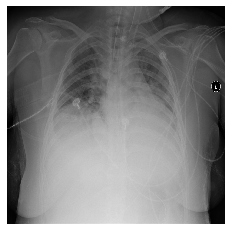

In [28]:
ds = pydicom.read_file(df_final['dicom'][4])
img = ds.pixel_array
pylab.imshow(img, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [ ]:
'''
import os
path = os.listdir('./train_img1_jpg/')
file = path[4]
img = cv2.imread('./train_img1_jpg/'+df_final['dicom'][4].split('/')[2].split('.')[0]+'.jpg',0)
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
cv2.imshow('image',img)
cv2.waitKey(0)
v2.destroyAllWindows() 
'''

In [37]:
path = os.listdir('./train_img1_jpg/')
lst = []
for i in range(len(path)):
    lst.append(path[i].split('.')[0])

In [39]:
df_train = df_final.reindex(lst,columns=['dicom','boxes','class','label'])


In [40]:
df_train

,dicom,boxes,class,label
0004cfab-14fd-4e49-80ba-63a80b6bddd6,./stage_2_train_images/0004cfab-14fd-4e49-80ba...,[],No Lung Opacity / Not Normal,0
000924cf-0f8d-42bd-9158-1af53881a557,./stage_2_train_images/000924cf-0f8d-42bd-9158...,[],Normal,0
000db696-cf54-4385-b10b-6b16fbb3f985,./stage_2_train_images/000db696-cf54-4385-b10b...,"[[318.0, 316.0, 478.0, 170.0], [318.0, 316.0, ...",Lung Opacity,1
000fe35a-2649-43d4-b027-e67796d412e0,./stage_2_train_images/000fe35a-2649-43d4-b027...,"[[282.0, 570.0, 409.0, 269.0], [282.0, 570.0, ...",Lung Opacity,1
001031d9-f904-4a23-b3e5-2c088acd19c6,./stage_2_train_images/001031d9-f904-4a23-b3e5...,"[[160.0, 66.0, 608.0, 373.0], [160.0, 66.0, 60...",Lung Opacity,1
0010f549-b242-4e94-87a8-57d79de215fc,./stage_2_train_images/0010f549-b242-4e94-87a8...,[],Normal,0
001916b8-3d30-4935-a5d1-8eaddb1646cd,./stage_2_train_images/001916b8-3d30-4935-a5d1...,"[[375.0, 198.0, 206.0, 114.0]]",Lung Opacity,1
0022073f-cec8-42ec-ab5f-bc2314649235,./stage_2_train_images/0022073f-cec8-42ec-ab5f...,"[[232.0, 575.0, 528.0, 246.0], [232.0, 575.0, ...",Lung Opacity,1
0022995a-45eb-4cfa-9a59-cd15f5196c64,./stage_2_train_images/0022995a-45eb-4cfa-9a59...,[],Normal,0
0025d2de-bd78-4d36-9f72-e15a5e22ca82,./stage_2_train_images/0025d2de-bd78-4d36-9f72...,[],Normal,0


In [41]:
df_train.shape

(26684, 4)

In [43]:
y_label = np.array(df_train['label'].reset_index(drop=True))
y_class = np.array(df_train['class'].reset_index(drop=True))
y_boxes = np.array(df_train['boxes'].reset_index(drop=True))

In [44]:
def draw(data):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    pylab.imshow(im, cmap=pylab.cm.gist_gray)
    pylab.axis('off')

def overlay_box(im, box, rgb, stroke=1):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

In [45]:
print(parsed[train_labels['patientId'][4]])


{'dicom': './stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm', 'label': 1, 'boxes': [[152.0, 264.0, 379.0, 213.0], [152.0, 264.0, 379.0, 213.0], [152.0, 562.0, 453.0, 256.0], [152.0, 562.0, 453.0, 256.0]], 'class': 'Lung Opacity'}


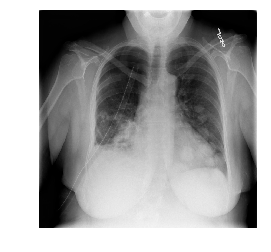

In [46]:
draw(parsed[train_data['patientId'][0]])


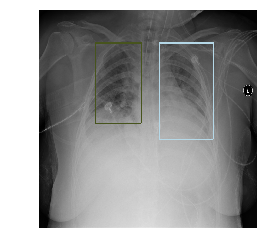

In [47]:
draw(parsed[train_data['patientId'][4]])

In [ ]:
if not os.path.exists('./test_jpg/'):
    os.mkdir('./test_jpg/')
    folder_path = './stage_2_test_images/'
    jpg_path = './test_jpg/'
    path = os.listdir(folder_path)
    for idx,image in enumerate(path):
        img = pydicom.dcmread(os.path.join(folder_path,image))
        rows=[]
        img_pixel = img.pixel_array
        image = image.replace('.dcm','.jpg')
        cv2.imwrite(os.path.join(jpg_path,image),img_pixel)

In [61]:
img_data_list=[]
path = './train_img1_jpg/'
for data in os.listdir('./train_img1_jpg/'):
    img_path = path + data
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #print('Input image shape:', x.shape)
    img_data_list.append(x)
    

In [65]:
import pickle
with open('img_data_list.txt', "wb") as fp:
    pickle.dump(img_data_list, fp)
# For reading
#with open("test.txt", "rb") as fp:
    #b = pickle.load(l, fp)


KeyboardInterrupt



In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data_list, y_label, test_size=0.2, random_state=2)

In [ ]:
x_tr = np.array(X_train[:5000])
x_trn = x_tr.reshape(x_tr.shape[0], 224, 224, 3)


In [215]:
x_ts = np.array(X_test[:50])
x_tst = x_ts.reshape(x_ts.shape[0], 224, 224, 3)

In [53]:
path = './train_img1_jpg/'
for data in os.listdir('./train_img1_jpg/'):
    img_path = path + data
    print(img_path)
    break

./train_img1_jpg/0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg


# Now we have Dicom data 
# We have test images and train images converted from .dcm to .jpg


In [57]:
from keras.applications import ResNet50,resnet50,densenet
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,Model
from keras_preprocessing import image
from keras import optimizers
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dropout,Flatten
import tensorflow as tf

In [113]:
TRAIN_DIR = './stage_2_train_images'
VALID_DIR = './stage_2_test_images'
SIZE = (224,224,3)
BATCH_SIZE=32
gen = keras.preprocessing.image.ImageDataGenerator()
val_gen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

batches = gen.flow_from_directory(TRAIN_DIR, target_size=SIZE, class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)
val_batches = val_gen.flow_from_directory(VALID_DIR, target_size=SIZE, class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)



In [178]:
#resnet50 = ResNet50(include_top = False,pooling='avg',weights=weights)
input_image = Input(shape=(224, 224, 3))
resnet50 = ResNet50(include_top=False, input_tensor=input_image, input_shape=(224,224,3),pooling='avg')
resnet50.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
for layer in resnet50.layers[:]:
    layer.trainable = False    
#make the last 9 layers trainable
for layer in resnet50.layers[len(resnet50.layers)-9:]:
    layer.trainable = True

In [194]:
#image_input = Input(shape=(224, 224, 3))
#model = resnet50(include_top=True, weights=wt, input_tensor=input_image)
#model.summary()
x = resnet50.output
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)

out = Dense(1, activation='sigmoid',name='output_layer')(x)

# this is the model we will train
model = Model(inputs=resnet50.input, outputs=out)

model.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

activation_500 (Activation)     (None, 56, 56, 256)  0           add_163[0][0]                    
__________________________________________________________________________________________________
res3a_branch2a (Conv2D)         (None, 28, 28, 128)  32896       activation_500[0][0]             
__________________________________________________________________________________________________
bn3a_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_501 (Activation)     (None, 28, 28, 128)  0           bn3a_branch2a[0][0]              
__________________________________________________________________________________________________
res3a_branch2b (Conv2D)         (None, 28, 28, 128)  147584      activation_501[0][0]             
__________________________________________________________________________________________________
bn3a_branc

__________________________________________________________________________________________________
bn3d_branch2c (BatchNormalizati (None, 28, 28, 512)  2048        res3d_branch2c[0][0]             
__________________________________________________________________________________________________
add_167 (Add)                   (None, 28, 28, 512)  0           bn3d_branch2c[0][0]              
                                                                 activation_509[0][0]             
__________________________________________________________________________________________________
activation_512 (Activation)     (None, 28, 28, 512)  0           add_167[0][0]                    
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, 14, 14, 256)  131328      activation_512[0][0]             
__________________________________________________________________________________________________
bn4a_branc

__________________________________________________________________________________________________
bn4d_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4d_branch2b[0][0]             
__________________________________________________________________________________________________
activation_523 (Activation)     (None, 14, 14, 256)  0           bn4d_branch2b[0][0]              
__________________________________________________________________________________________________
res4d_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_523[0][0]             
__________________________________________________________________________________________________
bn4d_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4d_branch2c[0][0]             
__________________________________________________________________________________________________
add_171 (Add)                   (None, 14, 14, 1024) 0           bn4d_branch2c[0][0]              
          

__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, 7, 7, 512)    2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_534 (Activation)     (None, 7, 7, 512)    0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, 7, 7, 512)    2359808     activation_534[0][0]             
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, 7, 7, 512)    2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_535 (Activation)     (None, 7, 7, 512)    0           bn5b_branch2b[0][0]              
__________

In [189]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
adam = optimizers.Adam(lr=0.001,decay = 1e-6)


In [193]:
# Early Callback and Check Point
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
#reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [182]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [183]:
def dice_coefficient(y_true, y_pred,smooth=1):
    #### Add your code here ####
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [205]:
from keras import backend as K
#model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels.h5')
#model.compile(loss=loss, optimizer="adam")
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])


In [56]:
'''
import numpy as np
import glob
import cv2
X_data = []
files = glob.glob ("./train_img1_jpg/*.jpg")
for i in range(len(files)-1):
    #print(myFile)
        img = cv2.imread (files[i])
        img = cv2.resize(img,(512,512), interpolation = cv2.INTER_LANCZOS4)
    #print(img)
    #cv2.imshow('image',img)
        X_data.append(img)
        if i == 1000:
            break
'''

In [66]:
'''
for i in range(5001,len(files)-1):
    #print(myFile)
        img = cv2.imread (files[i])
        img = cv2.resize(img,(512,512), interpolation = cv2.INTER_LANCZOS4)
    #print(img)
    #cv2.imshow('image',img)
        X_data.append(img)
        if i == 9999:
            break
            '''

In [ ]:
fit_model = model.fit(x_trn[:500],y_train[:500],
                    epochs=1,batch_size=1,
                    callbacks=[checkpoint, stop],
                    verbose=1)

In [216]:
y_pred = model.predict(x_tst)


In [131]:
x_tr = np.array(X_train[:5000])
x_trn = x_tr.reshape(x_tr.shape[0], 224, 224, 3)


In [ ]:
model.fit_generator(batches, steps_per_epoch=num_train_steps, epochs=1000, callbacks=[early_stopping, checkpointer], validation_data=val_batches, validation_steps=num_valid_steps)

model.save('resnet50_final.h5')

In [ ]:
fit_model = model.fit(x_trn,y_train[:5000],
                    epochs=10,batch_size=64,
                    callbacks=[checkpoint, reduce_lr, stop],
                    verbose=1)
model.save('model')

In [222]:
type(y_pred)

numpy.ndarray

In [225]:
y_tst = np.float32(y_test[:50])

In [227]:
type(y_tst)

numpy.ndarray

In [239]:
y_tst = np.reshape(y_tst,(50,1))

In [242]:
y_tst.shape,y_pred.shape


((50, 1), (50, 1))

In [244]:
model.evaluate(x_tst[:50],y_tst)

50/50 [==============================] - ETA: 14 - 38s 754ms/step


[0.5434434533119201, 0.8000000047683716]